# Final Report

Transplant the necessary code from `eda.ipynb` to this notebook, and clean everything up for presentation!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
onebedroom = pd.read_csv('data/City_MedianRentalPrice_1Bedroom.csv')
fourbedroom = pd.read_csv('data/City_MedianRentalPrice_4Bedroom.csv')
onebedroom['bedrooms'] = 1
fourbedroom['bedrooms'] = 4

In [3]:
onebedroom.shape

(818, 126)

In [4]:
fourbedroom.shape

(316, 126)

In [5]:
#find unique values of city, I believe this is why onebedroom has 500+ rows
onebedroom.RegionName.nunique()

773

In [6]:
fourbedroom.RegionName.nunique()

309

In [7]:
# All Rentals DF:
rentals = pd.concat([onebedroom, fourbedroom])

In [8]:
rentals.head()


,Unnamed: 0,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,bedrooms
0,0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,...,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0,1
1,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0,1
2,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,...,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0,1
3,3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,...,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0,1
4,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,...,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5,1


In [9]:
rentals.drop('Unnamed: 0', inplace=True, axis=1)
rentals.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,bedrooms
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,2369.0,...,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0,1
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,NaN,...,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0,1
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,NaN,...,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0,1
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,NaN,...,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0,1
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5,1


In [10]:
rentals.dtypes

RegionName     object
State          object
Metro          object
CountyName     object
SizeRank        int64
               ...   
2019-09       float64
2019-10       float64
2019-11       float64
2019-12       float64
bedrooms        int64
Length: 125, dtype: object

In [11]:
# Will need to convert dates to date obj (will do in smaller df's) not in column names

rentals.head(1)

,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,bedrooms
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,2369.0,...,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0,1


In [12]:
boston_rentals = rentals [rentals['RegionName'] == 'Boston']


In [13]:
boston_dates = boston_rentals.drop(boston_rentals.columns[[0, 1, 2, 3, 4, 5]], axis=1)
boston_dates.head()


,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,bedrooms
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2150.0,2175.0,2195.0,2200.0,2150.0,2200.0,2300.0,2300.0,2375.0,1
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3600.0,3600.0,3600.0,3600.0,3550.0,3550.0,3500.0,3600.0,3900.0,4


In [14]:
dates1 = []
dates2 = []
rental_prices1 = []
rental_prices2 = []

for col in boston_dates:
    dates1.append(col)
    dates2.append(col)

    
one_bedroom_dates = pd.DataFrame(dates1, columns = ['Date'])
four_bedroom_dates = pd.DataFrame(dates2, columns = ['Date'])

one_bedroom_rent = boston_rentals.iloc[0].drop(boston_rentals.columns[[0, 1, 2, 3, 4, 5]])
four_bedroom_rent = boston_rentals.iloc[1].drop(boston_rentals.columns[[0, 1, 2, 3, 4, 5]])

for price in one_bedroom_rent:
    rental_prices1.append(price)
    
for price in four_bedroom_rent:
    rental_prices2.append(price)
    
rents1 = pd.DataFrame(rental_prices1, columns = ['Rent'])

rents2 = pd.DataFrame(rental_prices2, columns = ['Rent'])



boston_rents1 = pd.concat([one_bedroom_dates, rents1], axis='columns')
boston_rents1['Bedrooms'] = 'one'
boston_rents1.drop(boston_rents1.tail(1).index, inplace=True)

boston_rents2 = pd.concat([four_bedroom_dates, rents2], axis='columns')
boston_rents2['Bedrooms'] = 'four'
boston_rents2.drop(boston_rents2.tail(1).index, inplace=True)


one_vs_four = pd.concat([boston_rents1, boston_rents2])

one_vs_four




,Date,Rent,Bedrooms
0,2010-03,NaN,one
1,2010-04,NaN,one
2,2010-05,NaN,one
3,2010-06,NaN,one
4,2010-07,NaN,one
...,...,...,...
113,2019-08,3550.0,four
114,2019-09,3550.0,four
115,2019-10,3500.0,four
116,2019-11,3600.0,four


In [15]:
one_vs_four.Date = one_vs_four.Date.apply(pd.to_datetime, errors='coerce')
one_vs_four.head()

,Date,Rent,Bedrooms
0,2010-03-01,NaN,one
1,2010-04-01,NaN,one
2,2010-05-01,NaN,one
3,2010-06-01,NaN,one
4,2010-07-01,NaN,one


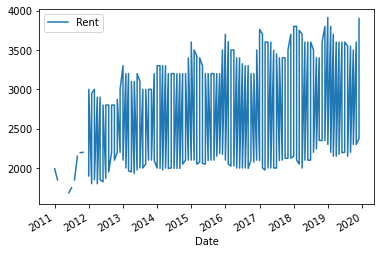

In [29]:
mapping_dict = { 'one': 0,'four': 1 }
one_vs_four['bed_as_num'] = one_vs_four['Bedrooms'].map(mapping_dict)
one_vs_four
# one_vs_four.plot(kind='scatter', x='Date', y='Rent', figsize=(13, 8), s=2, c='bed_as_num', colormap='winter');
one_vs_four.plot(kind='line', x='Date', y='Rent');



In [27]:
one = one_vs_four[one_vs_four['Bedrooms'] == 'one']['Rent'].tolist()
two = one_vs_four[one_vs_four['Bedrooms'] == 'four']['Rent'].tolist()


one_vs_four[one_vs_four['Bedrooms'] == 'one']['Rent'].tolist()
one_vs_four[one_vs_four['Bedrooms'] == 'four']['Rent'].tolist()
# df = pd.DataFrame({
#    'One Bedroom': one,
#    'Four Bedroom': two
#    }, index= one_vs_four['Date'])

# df.head()
# lines = df.plot.line()




# one_vs_four.plot.line()

# one_line = one_vs_four[one_vs_four['Bedrooms'] == 'one']['Rent']
# one_line.head()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 3000.0,
 2950.0,
 3000.0,
 2900.0,
 2900.0,
 2800.0,
 2800.0,
 2800.0,
 2800.0,
 2800.0,
 2872.5,
 3000.0,
 3300.0,
 3200.0,
 3200.0,
 3100.0,
 3100.0,
 3200.0,
 3100.0,
 3000.0,
 3000.0,
 3000.0,
 3000.0,
 3200.0,
 3300.0,
 3300.0,
 3300.0,
 3300.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3400.0,
 3600.0,
 3500.0,
 3425.0,
 3400.0,
 3300.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3200.0,
 3500.0,
 3700.0,
 3605.0,
 3500.0,
 3500.0,
 3400.0,
 3400.0,
 3325.0,
 3300.0,
 3300.0,
 3200.0,
 3200.0,
 3500.0,
 3762.5,
 3700.0,
 3600.0,
 3600.0,
 3600.0,
 3495.0,
 3450.0,
 3400.0,
 3400.0,
 3400.0,
 3500.0,
 3700.0,
 3800.0,
 3800.0,
 3750.0,
 3700.0,
 3600.0,
 3600.0,
 3600.0,
 3500.0,
 3400.0,
 3400.0,
 3600.0,
 3800.0,
 3912.5,
 3800.0,
 3700.0,
 3600.0,
 3600.0,
 3600.0,
 3600.0,
 3550.0,
 3550.0,
 3500.0,
 3600.0,
 3900.0]